# Student Performance Analysis

### Loading and checking data

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff

In [4]:
stats = pd.read_csv('C:/Users/Ola/Downloads/StudentsPerformance.csv')

In [5]:
stats.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
stats['score sum'] = stats['math score'] + stats['reading score'] + stats['writing score']
stats.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score sum
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [7]:
stats.reset_index(inplace=True)
stats.rename(columns=lambda x: x.replace('index', 'id'), inplace=True)
stats.head()

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score sum
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,1,female,group C,some college,standard,completed,69,90,88,247
2,2,female,group B,master's degree,standard,none,90,95,93,278
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,4,male,group C,some college,standard,none,76,78,75,229


In [8]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test preparation course      1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
 9   score sum                    1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [9]:
stats.isnull().sum()

id                             0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score sum                      0
dtype: int64

In [10]:
stats.dtypes

id                              int64
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
score sum                       int64
dtype: object

### Statistical analysis

In [11]:
stats.drop('id', axis=1, inplace=True)
stats.head()
stats.describe()

,math score,reading score,writing score,score sum
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [12]:
# highest score 
stats[stats['score sum'] == stats['score sum'].max()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score sum
458,female,group E,bachelor's degree,standard,none,100,100,100,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300


In [13]:
# average of score sum of students with test preparation course and without
stats.groupby('test preparation course').mean()['score sum']

test preparation course
completed    218.008380
none         195.116822
Name: score sum, dtype: float64

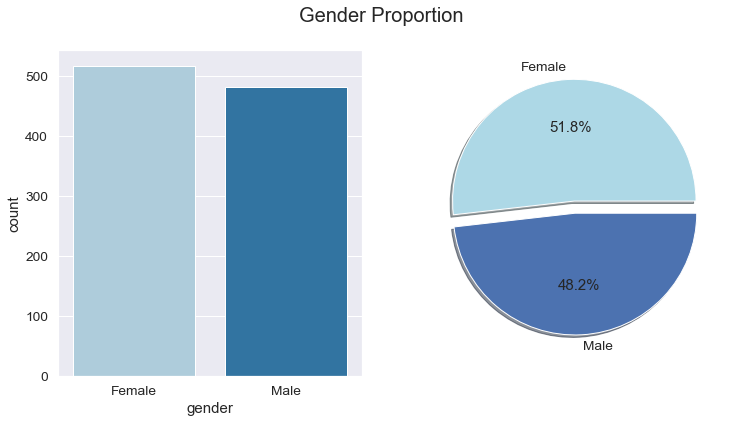

In [14]:
# gender analysis
stats['gender'] = stats['gender'].apply(lambda x : x.title())

sns.set_color_codes("muted")
sns.set_style('darkgrid')
sns.set(font_scale = 1.25)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

fig.suptitle('Gender Proportion', fontsize = 20)
sns.countplot(stats['gender'], ax = ax1, palette = 'Paired')
ax2.pie(stats['gender'].value_counts(), labels = ['Female', 'Male'], explode=(0.1, 0), autopct = '%1.1f%%', shadow = True, colors = ['lightblue', 'b'])
plt.show()

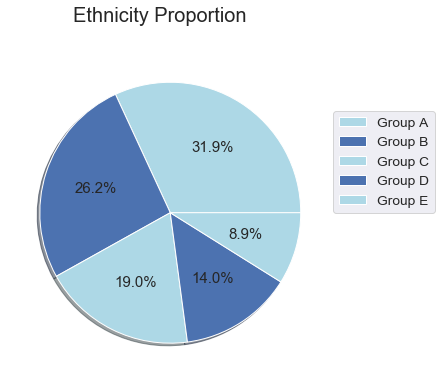

In [15]:
# ethinicity analysis

stats['race/ethnicity'] = stats['race/ethnicity'].apply(lambda x : x.title())

sns.set_color_codes("muted")
sns.set_style('darkgrid')
sns.set(font_scale = 1.25)

fig, ax2 = plt.subplots(figsize = (12, 6))

fig.suptitle('Ethnicity Proportion', fontsize = 20)
ax2.pie(stats['race/ethnicity'].value_counts(), autopct = '%1.1f%%', shadow = True, colors = ['lightblue', 'b'])

labels = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
plt.legend(labels, loc=(1, 0.5))
plt.show()


In [16]:
stats.drop(['score sum'], axis=1, inplace=True)
stats.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Female,Group B,bachelor's degree,standard,none,72,72,74
1,Female,Group C,some college,standard,completed,69,90,88
2,Female,Group B,master's degree,standard,none,90,95,93
3,Male,Group A,associate's degree,free/reduced,none,47,57,44
4,Male,Group C,some college,standard,none,76,78,75


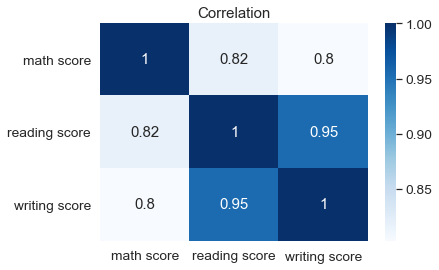

In [17]:
correlation = stats.corr()
plt.title('Correlation')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap="Blues", annot=True)

##### All values are strongly correlated. 

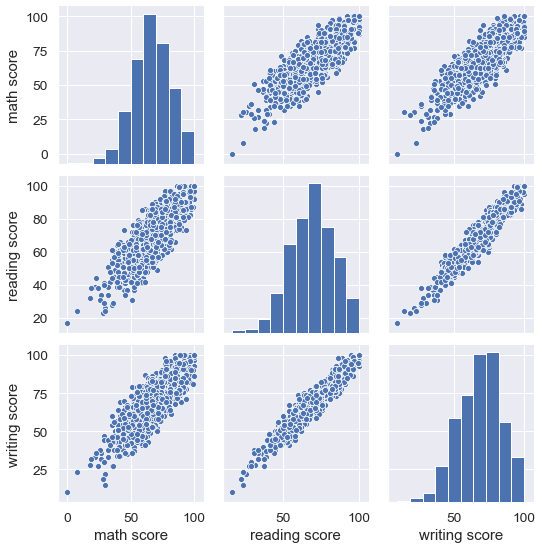

In [18]:
# pair plot of student's scores
sns.pairplot(stats)

In [19]:
viz1=go.Box(
    y=stats['math score'],
    name='Math Score',
    marker=dict(color='rgb(12,12,140)')
)
viz2=go.Box(
    y=stats['writing score'],
    name='Writing Score',
    marker = dict(
        color = 'rgb(12, 128, 128)')
)
viz3=go.Box(
    y=stats['reading score'],
    name='Reading Score',
    marker = dict(
        color = 'rgb(12, 105, 130)')
)

stats1=[viz1,viz2,viz3]
iplot(stats1)


##### The average of female students is higher except for mathematics.

In [20]:
# Creating histograms
x1 = stats['math score']
x2 = stats['reading score']
x3 = stats['writing score']

# Group data together
hist_data = [x1, x2, x3]
colors = ['#835AF1', '#7FA6EE', '#B8F7D4']

group_labels = ['Math Score', 'Reading Score', 'Writing Score']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=2, colors=colors)
fig.update_layout(title_text = 'Distplot for each score')
fig.show()

##### Most scores are above 50 points from each exam. 